# спринт № 7


## оглавление
<a id="title"></a>

* [Теория](#theory)
    * [Жадные алгоритмы](#theory_1)
    * [Задача о расписании](#theory_2)
    * [](#theory_3)
    * [](#theory_4)
    * [](#theory_5)
* [Задачи спринта](#tasks)
    * [A. Биржа](#A)
    * [B. Расписание](#B)
    * [C. Золотая лихорадка](#C)
    * [D. ](#D)
    * [E. ](#E)
    * [F. ](#F)
    * [G. ](#G)
    * [H. ](#H)
    * [I. ](#I)
    * [J. ](#J)
    * [K. ](#K)
    * [L. ](#L)
    * [M. ](#M)
    * [N. ](#N)
    * [O. ](#O)
* [Финальное задание](#final_tasks)
    * [A. ](#fin_A)
    * [B. ](#fin_B)
* [Resume](#resume)
* [Неудачые дубли](#fails)


In [1]:
import pandas as pd
from textwrap import dedent
from IPython import get_ipython

In [2]:
def create_cell(shell, text):
    payload = dict(
        source='set_next_input',
        text=text,
        replace=False,
    )
    shell.payload_manager.write_payload(payload, single=False)
    
    
shell = get_ipython()

In [4]:
create_cell(shell, 'blaaaaa')

In [ ]:
blaaaaa

blaaaaa

In [53]:
%%script false

from IPython.display import display, Javascript

def add_cell(text,  type='code', direct='above'):
    text = text.replace('\n','\\n').replace("\"", "\\\"").replace("'", "\\'")

    display(Javascript('''
    var cell = IPython.notebook.insert_cell_{}("{}")
    cell.set_text("{}")
    '''.format(direct, type, text)));
    
list_A = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']
for i in list_A:
    add_cell(f'<a id={i}></a> \n ### {i}. \n [go back to the title](#title)', 'markdown')
    add_cell(f'# code {i}')
    

CalledProcessError: Command 'b'\nfrom IPython.display import display, Javascript\n\ndef add_cell(text,  type=\'code\', direct=\'above\'):\n    text = text.replace(\'\\n\',\'\\\\n\').replace("\\"", "\\\\\\"").replace("\'", "\\\\\'")\n\n    display(Javascript(\'\'\'\n    var cell = IPython.notebook.insert_cell_{}("{}")\n    cell.set_text("{}")\n    \'\'\'.format(direct, type, text)));\n    \nlist_A = [\'A\', \'B\', \'C\', \'D\', \'E\', \'F\', \'G\', \'H\', \'I\', \'J\', \'K\', \'L\', \'M\', \'N\', \'O\']\nfor i in list_A:\n    add_cell(f\'<a id={i}></a> \\n ### {i}. \\n [go back to the title](#title)\', \'markdown\')\n    add_cell(f\'# code {i}\')\n    \n'' returned non-zero exit status 1.

<a id="theory_1"></a>
## Жадные алгоритмы
[go back to the title](#title)

Многие современные задачи связаны с нахождением оптимального значения какого-нибудь параметра. Например:

    найти такой маршрут из Москвы, чтобы путешественник посетил Владивосток, Якутск и Иркутск в любом порядке и при этом потратил на перелёты минимальную сумму денег;
    выбрать блогеров для размещения рекламы с ограниченным бюджетом так, чтобы её увидело максимальное число людей;
    составить план расширения сотовой сети таким образом, чтобы покрыть связью все необходимые области, используя при этом минимальное количество вышек.

Задачи нахождения оптимального значения называются «экстремальными», а процесс их решения — «оптимизацией».
Для оптимизации часто бывает необходимо считать интегралы и решать дифференциальные уравнения. Но в некоторых задачах можно найти экстремум, не обращаясь к серьёзной математике — с помощью жадных алгоритмов и динамического программирования.
О том, как это делается, мы расскажем в этом спринте. И начнём с жадных алгоритмов.

### Что такое жадность в алгоритме
Алгоритмы, о которых мы будем сейчас говорить, похожи на жадного до игрушек малыша: получив от родителей деньги на карманные расходы, он сразу же тратит их на какую-нибудь новую игрушку. Раз за разом он выбирает недорогую безделушку, которую может купить прямо сейчас и которая надоест ему уже завтра. Хотя он мог бы накопить побольше денег и потратить их на игру, которая увлекала бы его в течение долгого времени.
Жадные алгоритмы работают по такому же принципу: на каждом шаге они выбирают решение, оптимальное по определённому критерию (в случае с малышом — ценовая доступность игрушки прямо сейчас), не заглядывая в будущее.
В контексте данного урока мы будем называть тактикой действия, которые являются оптимальными в настоящий момент, безотносительно к перспективе; а стратегией — действия, которые могут не влиять на ситуацию сейчас или даже ухудшать её, но в долгосрочной перспективе приводят к наилучшему результату.
Бывают ситуации, когда оптимальное тактическое решение (например, всегда покупать максимально свежие овощи), совпадает с оптимальным стратегическим решением (сделать на ужин максимально свежий салат). В таких случаях применение жадных алгоритмов будет очень эффективным: они быстро работают, потому что не тратят времени на оценку последствий своего выбора.
Однако при подъёме на гору лучшее, на первый взгляд, тактическое решение — идти в сторону самого крутого подъёма — не поможет в достижении стратегической цели — оказаться на вершине самой высокой горы. Ведь иногда, чтобы забраться на самую высокую вершину, надо пройти по равнине — мимо нескольких менее высоких гор.
image
Если всегда идти в ту сторону, в которую гора возвышается круче всего, можно найти самую высокую точку этой горы (то есть локальный максимум). Но для того, чтобы найти самую высокую гору (то есть глобальный максимум), такая стратегия не подойдёт
Эта часть спринта может показаться слишком простой. Но не торопитесь с выводами! При кажущейся простоте жадные алгоритмы затрагивают сложные и важные темы.

### Гоша и сувениры
В последний день отпуска на Алгосах Гоша пришёл в сувенирный магазин, чтобы выбрать для своих друзей маленькие подарки из поездки — магниты для холодильника. Все они выглядят очень привлекательно, но цена у них разная. У Гоши с собой есть только X алгосских франков, и он хочет купить максимально возможное количество магнитов, чтобы порадовать как можно больше друзей. Какую тактику в этой ситуации следует выбрать Гоше?
Все магниты кажутся Гоше красивыми, поэтому единственный критерий, по которому он может их выбирать, это цена. Так как задача Гоши — купить как можно больше магнитов, то в приоритете будут самые дешёвые из них. Ведь чем меньше стоит каждый купленный магнит, тем больше денег остаётся на покупку оставшихся.
Алгоритм будет выглядеть так:

    Разложить магниты в порядке увеличения стоимости.
    До тех пор, пока хватает денег и не кончились магниты, покупать самый дешёвый магнит.

Скорее всего, под конец у Гоши останется какое-то количество алгосских франков, но если он при этом не сможет купить даже самый дешёвый магнит из оставшихся, то и на более дорогой ему денег не хватит.
Алла
Кажется, мы все иногда интуитивно ведём себя, как жадные алгоритмы.
Тимофей
Верно. Кстати, вы уже решали похожие задачи.
Рита
А я вспомнила про сортировку выбором, о которой читала после спринта с сортировками. Чтобы упорядочить массив, надо каждый раз просматривать ещё не отсортированную часть и выбирать наибольший или наименьший элемент — в зависимости от желаемого порядка сортировки.
Этот алгоритм перемещает найденный элемент в конец уже отсортированной части массива и не просчитывает, получится ли отсортировать весь массив или нет. Благодаря такому подходу после i-ого шага в отсортированной части массива будет i самых больших или самых маленьких значений. Любой элемент, расположенный правее этих i значений, будет или не больше, или не меньше любого из них.

В прошлом спринте мы разобрали несколько полезных алгоритмов. Как вы думаете, какие из них работают по жадному принципу?
Тоже правильный ответ
Алгоритм Дейкстры — для построения дерева оптимальных маршрутов.
На каждом шаге мы выбирали ещё не посещённую вершину, которая удалена от стартовой не больше, чем любая другая не посещённая вершина.
Правильный ответ
Алгоритм Прима — для построения минимального остовного дерева.
Поиск в глубину DFS.
Поиск в ширину BFS.

<a id="theory_1_end"></a>
Решите задачу «[Биржа](#A)».

[go back to the title](#title)

<a id="theory_2"></a>
## Задача о расписании
[go back to the title](#title)

Давайте рассмотрим ещё одну задачу, которая решается жадностью.
Алла приехала в город своего детства и хочет встретиться с подругами. Времени у неё мало — всего один день, а подруг много — и каждая зовёт Аллу на какое-нибудь мероприятие с точным временем начала и конца. Чтобы ничего не забыть, Алла внесла в календарь все события, на которые её пригласили подруги.
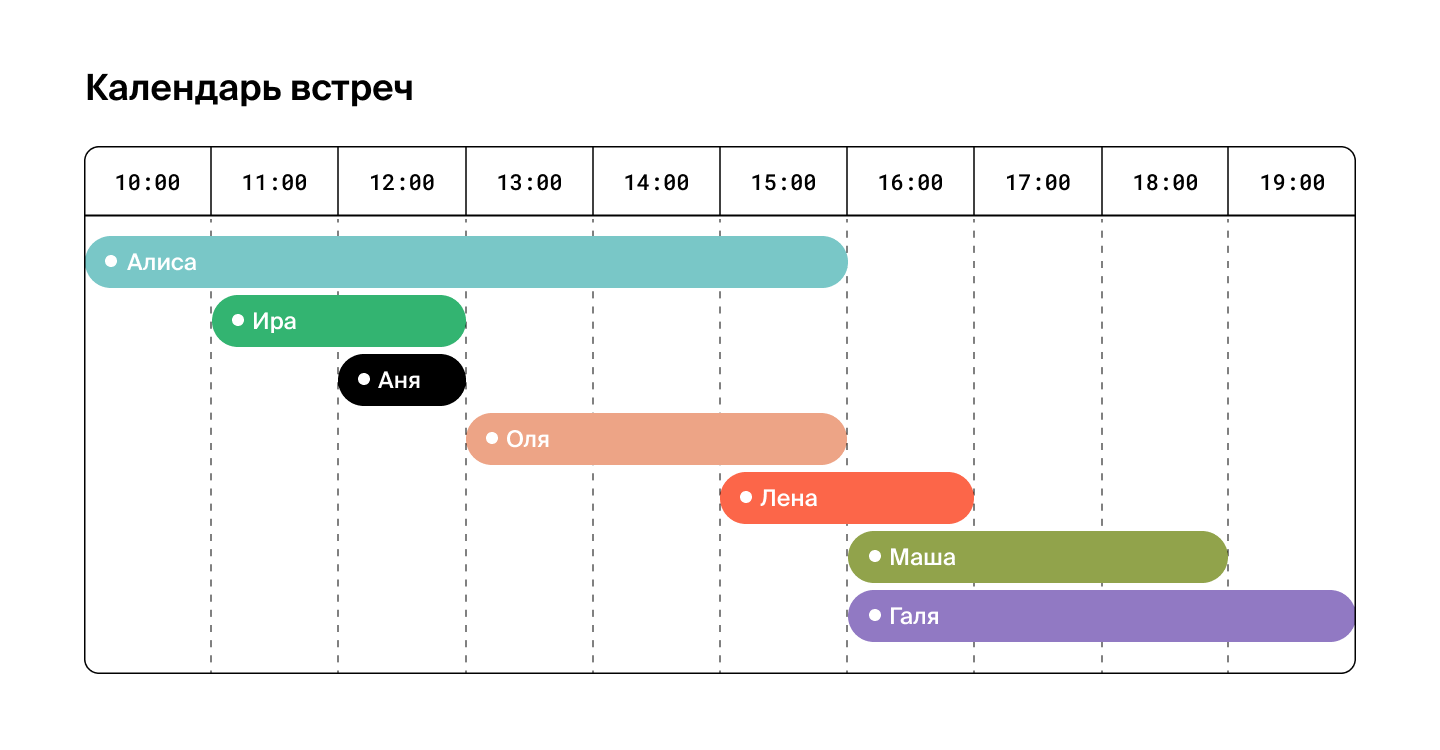

Получилось целых семь встреч за один день! Увы, ни приходить позже, ни уходить раньше Алла на эти встречи не сможет, так как она очень ответственная и пунктуальная девушка. Как же Алле выбрать, на какие мероприятия пойти, а какие пропустить — чтобы увидеть при этом как можно больше своих подруг?
### Варианты решений
Если Алла не хочет терять ни минуты , она пойдёт на то мероприятие, которое начинается раньше других.
Для этого ей нужно отсортировать все встречи по времени начала. При такой сортировке Алла:

    пойдёт на первое мероприятие из списка,
    пропустит все мероприятия, которые начнутся раньше, чем закончится то, на котором она находится сейчас.

После окончания встречи Алла будет выбирать новую по тому же алгоритму.

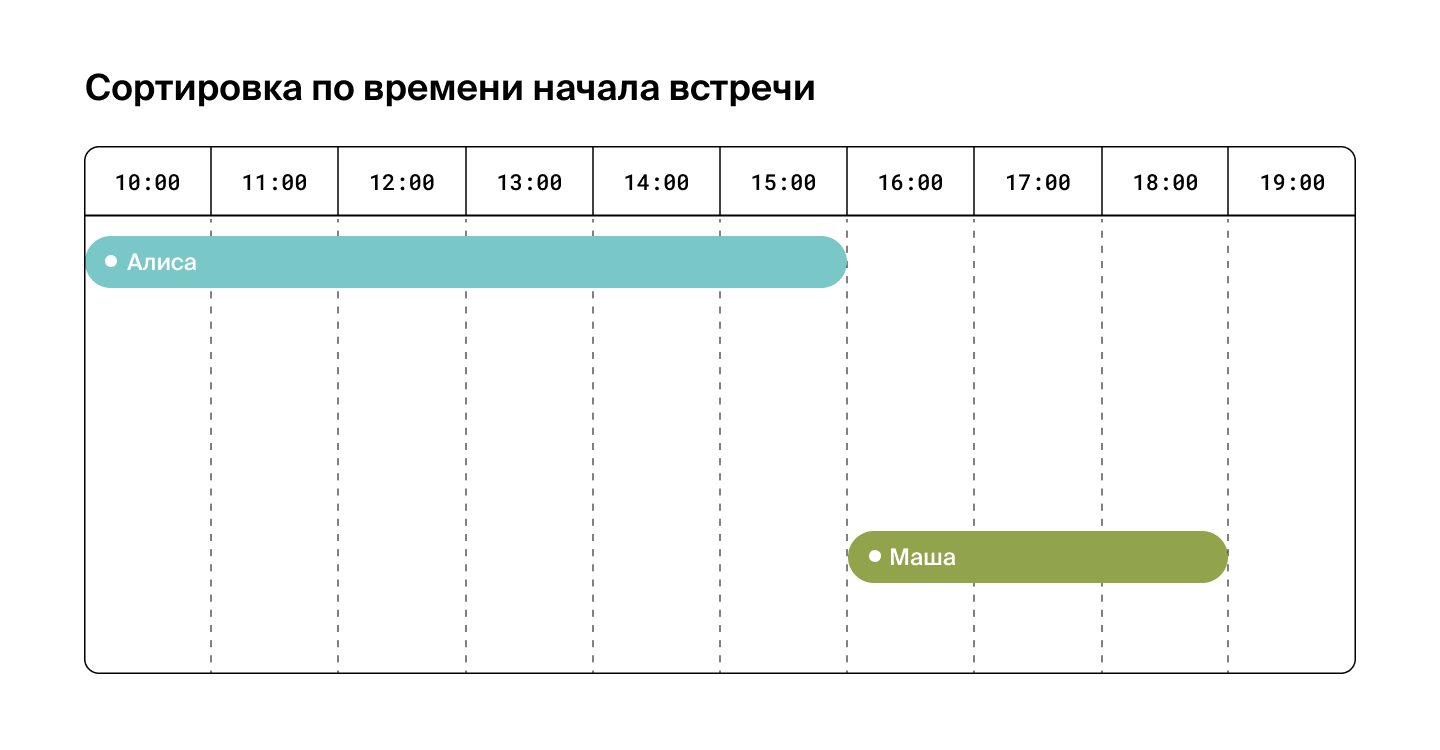

Алла
При такой стратегии у меня будет целых 9 часов встреч, а увижусь я только с Алисой и Машей. Мне кажется, это не самое лучшее решение. Попробую составить своё расписание иначе.
А что если я буду выбирать сначала самые короткие встречи, а потом те, что длиннее?
Рита
Гоша по этому же принципу смог купить максимально возможное количество сувениров. Вдруг и у тебя так получится встретиться с максимально возможным числом людей?

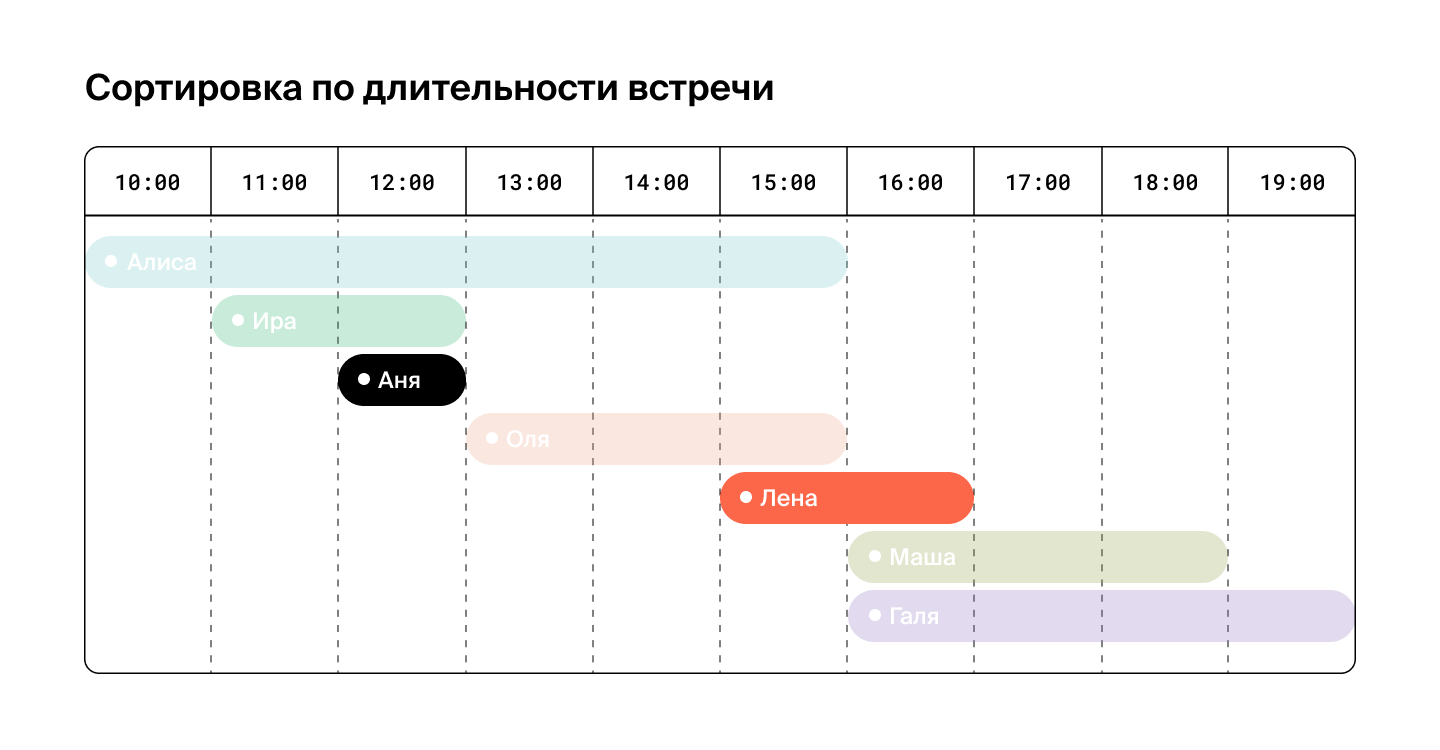

Опять плохо! Гоше было проще: ведь покупка одного магнита не мешала ему покупать другие. С мероприятиями так не получается.
Вот три самых коротких встречи: Аня (1 час), Ира (2 часа), Лена (2 часа). Но встречи с Ирой и с Аней пересекаются, поэтому Алла пойдёт только на одну из них.
Итого в расписании Аллы останется только 2 коротких встречи, и между ними не получится вставить ничего другого. Но если Алла отменит мероприятие с Леной, она сможет встретиться и с Олей, и с Машей. А это уже целых три встречи вместо двух!
Рита
У меня есть идея! Попробуй выбирать мероприятие, которое ещё не началось, но закончится раньше остальных.
Алла
Хм... Это какая-то совсем непонятная жадность, но результат верный. Так я действительно смогу посетить целых три встречи.
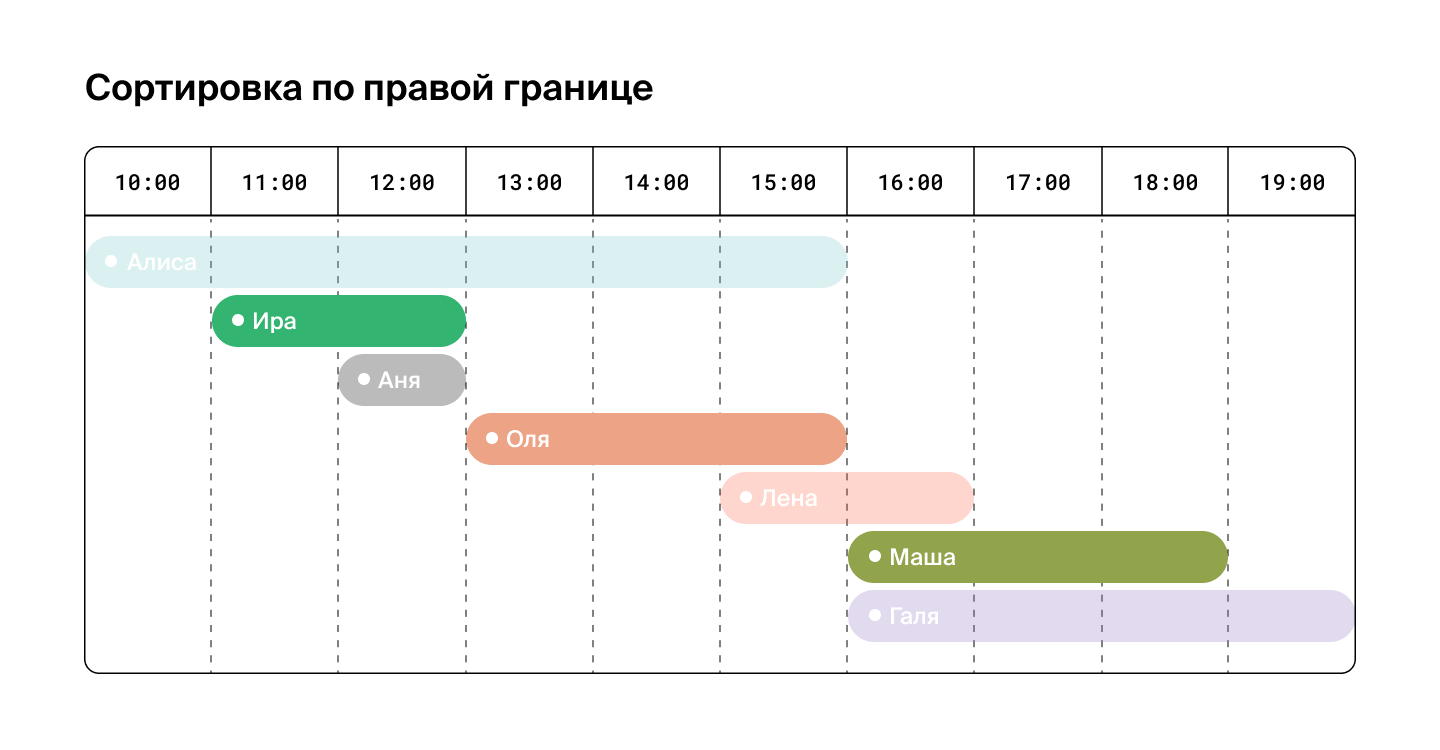

Рита
Объяснить готовое решение можно так: чем раньше закончится мероприятие, тем больше времени для других встреч у тебя останется!
Алла
Действительно! Спасибо за помощь!

<a id="theory_2_end"></a>
Решите задачу «[Расписание](#B)».

[go back to the title](#title)

<a id="tasks"></a>
## Промежуточные задачи спринта
[телепорт обратно в оглавление](#title)

Ссылка на контекст: https://contest.yandex.ru/contest/25596/problems

<a id="A"></a>
### A. Биржа
[телепорт в оглавление](#title)  &&    [обратно к теме](#theory_1_end)

    Язык 	Ограничение времени 	Ограничение памяти 	Ввод 	Вывод
    Все языки 	0.1 секунда 	64Mb 	стандартный ввод или input.txt 	стандартный вывод или output.txt
    Node.js 14.15.5 	0.2 секунды 	64Mb
    C# (MS .Net 5.0)+ASP 	0.2 секунды 	64Mb
    Oracle Java 8 	0.4 секунды 	64Mb
    OpenJDK Java 11 	0.4 секунды 	64Mb
    Node JS 8.16 	0.2 секунды 	64Mb

Рита хочет попробовать поиграть на бирже. Но для начала она решила потренироваться на исторических данных.

Даны стоимости акций в каждый из n дней. В течение дня цена акции не меняется. Акции можно покупать и продавать, но только по одной штуке в день. В один день нельзя совершать более одной операции (покупки или продажи). Также на руках не может быть более одной акции в каждый момент времени.

Помогите Рите выяснить, какую максимальную прибыль она могла бы получить.

Пояснения к примерам

Пример 1
Рита может купить акцию во 2-й день за 1 франк.

Затем она продаст её на 3-й день за 5 франков.

В 4-й день она снова купит акцию за 3 франка.

На 5-й день Рита продаст эту акцию за 6 франков.

Прибыль составила (5 - 1) + (6 - 3) = 7 франков.

Пример 2
Рите выгодно купить акцию в самый первый день и продать в последний.

Пример 3
Рита покупает акции в дни с номерами 1, 3 и 5. Продаёт в дни 2, 4 и 6. Итоговая прибыль составит (12 - 1) + (16 - 12) + (8 - 1) = 22. Такой же результат можно получить в виде: 22 = (16 - 1) + (8 - 1), если покупать акции в дни 1 и 5, а продавать в дни 4 и 6.
#### Формат ввода

В первой строке записано количество дней n —– целое число в диапазоне от 0 до 10 000.

Во второй строке через пробел записано n целых чисел в диапазоне от 0 до 1000 –— цены акций.
#### Формат вывода

Выведите число, равное максимально возможной прибыли за эти дни.
Пример 1
Ввод
Вывод

6
7 1 5 3 6 4

	

7

Пример 2
Ввод
Вывод

5
1 2 3 4 5

	

4

Пример 3
Ввод
Вывод

6
1 12 12 16 1 8

	

22


In [18]:
n = int(input())
string = input()

arr = list(map(int, string.split()))

prev = 1001
sum_ = 0

for item in arr:
    if item > prev:
        sum_ += (item - prev)
    prev = item
print(sum_)

1
6
0


<a id="B"></a>
### B. Расписание
[телепорт в оглавление](#title) 

    Язык 	Ограничение времени 	Ограничение памяти 	Ввод 	Вывод
    Все языки 	0.1 секунда 	64Mb 	стандартный ввод или input.txt 	стандартный вывод или output.txt
    Node.js 14.15.5 	0.3 секунды 	64Mb
    C# (MS .Net 5.0)+ASP 	0.3 секунды 	64Mb
    Oracle Java 8 	0.3 секунды 	64Mb
    OpenJDK Java 11 	0.5 секунд 	64Mb
    Node JS 8.16 	0.3 секунды 	64Mb

Дано количество учебных занятий, проходящих в одной аудитории. Для каждого из них указано время начала и конца. Нужно составить расписание, в соответствии с которым в классе можно будет провести как можно больше занятий.

Если возможно несколько оптимальных вариантов, то выведите любой. Возможно одновременное проведение более чем одного занятия нулевой длительности.
#### Формат ввода

В первой строке задано число занятий. Оно не превосходит 1000. Далее для каждого занятия в отдельной строке записано время начала и конца, разделённые пробелом. Время задаётся одним целым числом h, если урок начинается/заканчивается ровно в h часов. Если же урок начинается/заканчивается в h часов m минут, то время записывается как h.m. Гарантируется, что каждое занятие начинается не позже, чем заканчивается. Указываются только значащие цифры.
#### Формат вывода

Выведите в первой строке наибольшее число уроков, которое можно провести в аудитории. Далее выведите время начала и конца каждого урока в отдельной строке в порядке их проведения.
#### Пример 1
    Ввод
    Вывод

    5
    9 10
    9.3 10.3
    10 11
    10.3 11.3
    11 12



    3
    9 10
    10 11
    11 12

    Пример 2
    Ввод
    Вывод

    3
    9 10
    11 12.25
    12.15 13.3



    2
    9 10
    11 12.25

    Пример 3
    Ввод
    Вывод

    7
    19 19
    7 14
    12 14
    8 22
    22 23
    5 21
    9 23



    3
    7 14
    19 19
    22 23



In [ ]:
n = int(input())
arr = [None] * n
for i in range(n):
    item = input()
    a, b = item.split()
    arr[i] = (float(b), float(a), item)
# print(sorted(arr))

out = []
jops = sorted(arr)
last = 0
for item in jops:
#     print(item)
    if item[1] >= last:
        out.append(item[2])
        last = item[0]

print(len(out))
print(*out, sep='\n')


<a id=C></a> 
### C. Золотая лихорадка 
[go back to the title](#title)

    Ограничение времени 	1 секунда
    Ограничение памяти 	64Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

Гуляя по одному из островов Алгосского архипелага, Гоша набрёл на пещеру, в которой лежат кучи золотого песка. К счастью, у Гоши есть с собой рюкзак грузоподъёмностью до M килограмм, поэтому он может унести с собой какое-то ограниченное количество золота.

Всего золотых куч n штук, и все они разные. В куче под номером i содержится mi килограммов золотого песка, а стоимость одного килограмма — ci алгосских франков.

Помогите Гоше наполнить рюкзак так, чтобы общая стоимость золотого песка в пересчёте на алгосские франки была максимальной.
### Формат ввода

В первой строке задано целое число M — грузоподъёмность рюкзака Гоши (0 ≤ M ≤ 10^8).

Во второй строке дано количество куч с золотым песком — целое число n (1 ≤ n ≤ 10^5).

В каждой из следующих n строк описаны кучи: i-ая куча задаётся двумя целыми числами ci и mi, записанными через пробел (1 ≤ ci ≤ 10^7, 1 ≤ mi ≤ 10^8).
### Формат вывода

Выведите единственное число —– максимальную сумму (в алгосских франках), которую Гоша сможет вынести из пещеры в своём рюкзаке.
### Пример:
    Ввод/Вывод:
    10
    3
    8 1
    2 10
    4 5

    36

    Ввод/Вывод:
    10000
    1
    4 20

    80


In [8]:
# code C
M = int(input())
n = int(input())
arr = []
for i in range(n):
    arr.append(list(map(int, input().split())))

sum_ = 0
for item in sorted(arr, reverse=True):
#     print(item)
    if M > 0:
        sum_ += min(item[1], M) * item[0]
        M -= min(item[1], M)
    else:
        break

print(sum_)

10
3
8 1
2 10
4 5
[8, 1]
[4, 5]
[2, 10]
36


<a id=D></a> 
 ### D. 
 [go back to the title](#title)

In [18]:
# code D

def adult_fib(n):
    arr = [None] * (n + 1)
    arr[0] = 1
    if n == 0:
        return 1
    elif n == 1:
        return 1
    else:
        arr[1] = 1
        for i in range(2, n+1):
            arr[i] = (arr[i-1] + arr[i-2]) % (10**9 + 7)
#     print(arr)      
    return arr[n] 

if __name__ == '__main__':
    n = int(input())
    print(adult_fib(n))

5
[1, 1, 2, 3, 5, 8]
8


<a id=E></a> 
 ### E. 
 [go back to the title](#title)

In [ ]:
# code E

<a id=F></a> 
### F. Прыжки по лестнице
[go back to the title](#title)
 
    Язык 	Ограничение времени 	Ограничение памяти 	Ввод 	Вывод
    Все языки 	0.1 секунда 	64Mb 	стандартный ввод или input.txt 	стандартный вывод или output.txt
    Python 3.7.3 	0.3 секунды 	64Mb
    C# (MS .Net 5.0)+ASP 	0.2 секунды 	64Mb
    Oracle Java 8 	0.2 секунды 	64Mb
    OpenJDK Java 11 	0.2 секунды 	64Mb

Алла хочет доказать, что она умеет прыгать вверх по лестнице быстрее всех. На этот раз соревнования будут проходить на специальной прыгательной лестнице. С каждой её ступеньки можно прыгнуть вверх на любое расстояние от 1 до k. Число k придумывает Алла.

Гоша не хочет проиграть, поэтому просит вас посчитать количество способов допрыгать от первой ступеньки до n-й. Изначально все стоят на первой ступеньке.
### Формат ввода

В единственной строке даны два числа — n и k (1 ≤ n ≤ 1000, 1 ≤ k ≤ n).
### Формат вывода

Выведите количество способов по модулю 10^9 + 7.
### Пример:
    Ввод: 6 3
    Вывод: 13

    Ввод: 7 7
    Вывод: 32

    Ввод: 2 2
    Вывод: 1

In [1]:
# code F
n, k = list(map(int, input().split()))
# print(n, k)


dp = [None] * (n + 1)
dp[0] = 0
dp[1] = 1
dp[2] = 1


for i in range(3, n+1):
    sum_ = 0
    kek = min(k, i - 1)
#     print('i =', i, 'kek =', kek, 'start =', i - kek, 'end =', i - 1)
    for j in range(kek):
#         print('j = ', i - kek + j)
        sum_ += dp[i - kek + j]
        
    dp[i] = sum_
#     print(i,':', sum_, 'kek =', kek, 'start =', i - kek, 'end =', i - 1)

print(dp[n] % (10**9 + 7))

25 16
8388032


<a id=G></a> 
 ### G. 
 [go back to the title](#title)

In [ ]:
# code G

<a id=H></a> 
### H. Поле с цветочками
[go back to the title](#title)
 
    Все языки 	Python 3.7.3
    Ограничение времени 	1 секунда 	2 секунды
    Ограничение памяти 	64Mb 	64Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

Черепаха Кондратина путешествует по клетчатому полю из n строк и m столбцов. В каждой клетке либо растёт цветочек, либо не растёт. Кондратине надо добраться из левого нижнего в правый верхний угол и собрать как можно больше цветочков.

Помогите ей с этой сложной задачей и определите, какое наибольшее число цветочков она сможет собрать при условии, что Кондратина умеет передвигаться только на одну клетку вверх или на одну клетку вправо за ход.
### Формат ввода

В первой строке даны размеры поля n и m (через пробел). Оба числа лежат в диапазоне от 1 до 1000. В следующих n строках задано поле. Каждая строка состоит из m символов 0 или 1, записанных подряд без пробелов, и завершается переводом строки. Если в клетке записана единица, то в ней растёт цветочек.
### Формат вывода

Выведите единственное число — максимальное количество цветочков, которое сможет собрать Кондратина.
### Пример:
    Ввод
    Вывод

    2 3
    101
    110



    3

    Пример 2
    Ввод
    Вывод

    3 3
    100
    110
    001



    2


In [26]:
# code H
n, m = list(map(int, input().split()))
# print(n, m)
matrix = [None] * (n + 1)
for i in range(n):
    a = [0] + list(map(int, list(input())))
    matrix[i] = a
matrix[n] = [0] * (m + 1)
# print(*matrix, sep='\n')

cnt = [[0] * (m + 1) for i in range(n + 1)]
# print(cnt)

for i in range(n - 1, -1, -1):
    for j in range(1, m + 1):
#         print(matrix[i][j])
        cnt[i][j] = max(cnt[i + 1][j], cnt[i][j - 1]) + matrix[i][j]
    
# print(*cnt, sep='\n')
print(cnt[0][m])

3 3
3 3
100
110
001
[0, 1, 0, 0]
[0, 1, 1, 0]
[0, 0, 0, 1]
[0, 0, 0, 0]
[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
0
0
1
1
1
0
1
0
0
[0, 2, 2, 2]
[0, 1, 2, 2]
[0, 0, 0, 1]
[0, 0, 0, 0]
2


<a id=I></a> 
### I. Сложное поле с цветочками
[go back to the title](#title)

	Все языки 	Python 3.7.3
    Ограничение времени 	1 секунда 	2 секунды
    Ограничение памяти 	64Mb 	64Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

Теперь черепашке Кондратине надо узнать не только, сколько цветочков она может собрать, но и как ей построить свой маршрут для этого. Помогите ей!

Напомним, что Кондратине надо дойти от левого нижнего до правого верхнего угла, а передвигаться она умеет только вверх и вправо.
### Формат ввода

В первой строке даны размеры поля n и m (через пробел). Оба числа лежат в диапазоне от 1 до 1000. В следующих n строках задано поле. Каждая строка состоит из m символов 0 или 1 и завершается переводом строки. Если в клетке записана единица, то в ней растет цветочек.
### Формат вывода

Выведите в первой строке максимальное количество цветочков, которое сможет собрать Кондратина. Во второй строке выведите маршрут в виде последовательности символов «U» и «R», где «U» означает передвижение вверх, а «R» – передвижение вправо.

Если возможных оптимальных путей несколько, то выведите любой.
### Пример:
    Ввод
    Вывод

    2 3
    101
    110

    3
    URR

    Ввод
    Вывод

    3 3
    100
    110
    001

    2
    UURR


In [29]:
# code I
print(*cnt, sep='\n')

[0, 2, 2, 2]
[0, 1, 2, 2]
[0, 0, 0, 1]
[0, 0, 0, 0]


In [48]:
# code I
n, m = list(map(int, input().split()))
matrix = [None] * (n + 1)
for i in range(n):
    a = [0] + list(map(int, list(input())))
    matrix[i] = a
matrix[n] = [0] * (m + 1)

cnt = [[0] * (m + 1) for i in range(n + 1)]

for i in range(n - 1, -1, -1):
    for j in range(1, m + 1):
        cnt[n - i][j] = max(cnt[n - i - 1][j], cnt[n - i][j - 1]) + matrix[i][j]

print('frst_mtx:',*matrix, sep='\n')
print('cnt_mtrx:', *cnt, sep='\n')
        
massive = []
def func(i, j):
    print('vert n:', i, 'gorz m:', j, massive)
    if i == 1 and j == 1:
        return massive
    else:
        if i == 1:
            massive.append('R')
            func(i, j - 1)
        elif j == 1:
            massive.append('U')
            func(i - 1, j)
        elif cnt[i][j - 1] > cnt[i - 1][j]:
            massive.append('R')
            func(i, j - 1)
        else:
            massive.append('U')
            func(i - 1, j)
            
func(n, m)
print(cnt[n][m])
print(*list(reversed(massive)), sep='')

# 5 5
# 00101
# 00110
# 11010
# 11001
# 01010

3 3
100
110
001
frst_mtx:
[0, 1, 0, 0]
[0, 1, 1, 0]
[0, 0, 0, 1]
[0, 0, 0, 0]
cnt_mtrx:
[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 1, 2, 2]
[0, 2, 2, 2]
vert n: 3 gorz m: 3 []
vert n: 2 gorz m: 3 ['U']
vert n: 2 gorz m: 2 ['U', 'R']
vert n: 2 gorz m: 1 ['U', 'R', 'R']
vert n: 1 gorz m: 1 ['U', 'R', 'R', 'U']
2
URRU


In [51]:
# code I
n, m = list(map(int, input().split()))
matrix = [None] * (n + 1)
for i in range(n):
    a = [0] + list(map(int, list(input())))
    matrix[i] = a
matrix[n] = [0] * (m + 1)

cnt = [[0] * (m + 1) for i in range(n + 1)]

for i in range(n - 1, -1, -1):
    for j in range(1, m + 1):
        cnt[n - i][j] = max(cnt[n - i - 1][j], cnt[n - i][j - 1]) + matrix[i][j]

print('frst_mtx:',*matrix, sep='\n')
print('cnt_mtrx:', *cnt, sep='\n')
        
massive = []
i = n
j = m
while (i > 1 or j > 1):
    print('vert n:', i, 'gorz m:', j, massive)
    if i == 1 and j == 1:
        break
    elif i == 1:
        massive.append('R')
        j -= 1
    elif j == 1:
        massive.append('U')
        i -= 1
    elif cnt[i][j - 1] > cnt[i - 1][j]:
        massive.append('R')
        j -= 1
    else:
        massive.append('U')
        i -= 1
            
print(cnt[n][m])
print(*list(reversed(massive)), sep='')

# 5 5
# 00101
# 00110
# 11010
# 11001
# 01010

3 3
100
110
001
frst_mtx:
[0, 1, 0, 0]
[0, 1, 1, 0]
[0, 0, 0, 1]
[0, 0, 0, 0]
cnt_mtrx:
[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 1, 2, 2]
[0, 2, 2, 2]
vert n: 3 gorz m: 3 []
vert n: 2 gorz m: 3 ['U']
vert n: 2 gorz m: 2 ['U', 'R']
vert n: 2 gorz m: 1 ['U', 'R', 'R']
2
URRU


<a id=J></a> 
 ### J. 
 [go back to the title](#title)

In [45]:
# code J

<a id=K></a> 
### K. Гороскопы
[go back to the title](#title)
 
	Все языки 	Python 3.7.3
    Ограничение времени 	0.3 секунды 	2 секунды
    Ограничение памяти 	64Mb 	64Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

В мире последовательностей нет гороскопов. Поэтому когда две последовательности хотят понять, могут ли они счастливо жить вместе, они оценивают свою совместимость как длину их наибольшей общей подпоследовательности.

Подпоследовательность получается из последовательности удалением некоторого (возможно, нулевого) числа элементов. То есть элементы сохраняют свой относительный порядок, но не обязаны изначально идти подряд.

Найдите наибольшую общую подпоследовательность двух одиноких последовательностей и выведите её!
### Формат ввода

В первой строке дано число n — количество элементов в первой последовательности (1 ≤ n ≤ 1000). Во второй строке даны n чисел ai (0 ≤ |ai| ≤ 109) — элементы первой последовательности. Аналогично в третьей строке дано m (1 ≤ m ≤ 1000) — число элементов второй последовательности. В четвертой строке даны элементы второй последовательности через пробел bi (0 ≤ |bi| ≤ 109).
### Формат вывода

Сначала выведите длину найденной наибольшей общей подпоследовательности, во второй строке выведите индексы элементов первой последовательности, которые в ней участвуют, в третьей строке — индексы элементов второй последовательности. Нумерация индексов с единицы, индексы должны идти в корректном порядке.

Если возможных НОП несколько, то выведите любую.
### Пример:
    Ввод
    Вывод

    5
    4 9 2 4 6
    7
    9 4 0 0 2 8 4



    3
    1 3 4
    2 5 7

    Пример 2
    Ввод
    Вывод

    4
    1 1 1 1
    2
    2 2



    0

    Пример 3
    Ввод
    Вывод

    8
    1 2 1 9 1 2 1 9
    5
    9 9 1 9 9



    3
    3 4 8
    3 4 5


In [54]:
# code K
n = int(input())
a = list(map(int, input().split()))
m = int(input())
b = list(map(int, input().split()))



8
1 2 1 9 1 2 1 9
5
9 9 1 9 9
[0, 0, 0, 0, 0, 0]
[0, None, None, None, None, None]
[0, None, None, None, None, None]
[0, None, None, None, None, None]
[0, None, None, None, None, None]
[0, None, None, None, None, None]
[0, None, None, None, None, None]
[0, None, None, None, None, None]
[0, None, None, None, None, None]


In [70]:
a = [None] + a
b = [None] + b
dp = [[0] * (m + 1) for i in range(n + 1)]
print('before', *dp, sep='\n')

nop = 0
flag = 0
for i in range(1, n + 1):
    flag = 0
    for j in range(1, m + 1):
        if a[i] == b[j]:
            dp[i][j] = dp[i - 1][j - 1] + 1
        else:
            dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

print('after', *dp, sep='\n')




before
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
after
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 1, 1]
[0, 0, 0, 1, 1, 1]
[0, 0, 0, 1, 1, 1]
[0, 1, 1, 1, 2, 2]
[0, 1, 1, 2, 2, 2]
[0, 1, 1, 2, 2, 2]
[0, 1, 1, 2, 2, 2]
[0, 1, 2, 2, 3, 3]


In [73]:
i, j = n, m
answer = []
ans_a = []
ans_b = []
while dp[i][j] != 0:
    if a[i] == b[j]:
        answer.append(a[i])
        ans_a.append(i)
        ans_b.append(j)
        i -= 1
        j -= 1
    else:
        if dp[i][j] == dp[i - 1][j]:
            i -= 1
        elif dp[i][j] == dp[i][j - 1]:
            j -= 1

print(*list(reversed(answer)), sep='')

print(dp[n][m])
print(*list(reversed(ans_a)))
print(*list(reversed(ans_b)))

199
3
3 4 8
3 4 5


<a id=L></a> 
 ### L. 
 [go back to the title](#title)

In [47]:
# code L

<a id=M></a> 
### M. Рюкзак
[go back to the title](#title)
 
    Ограничение времени 	0.2 секунды
    Ограничение памяти 	64Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

Тимофей решил отправиться в поход. Ему надо собрать рюкзак. Так как поход долгий и трудный, необходимо подбирать вещи вдумчиво.

Каждому предмету Тимофей присвоил условную значимость: она равна ci для предмета с номером i. Также каждый предмет весит mi килограммов. А грузоподъёмность рюкзака  равна M килограмм.

Найдите максимальную суммарную значимость предметов, которые Тимофей может взять с собой, не порвав рюкзак, и укажите, как набрать эту значимость.
### Формат ввода

В первой строке вводится число предметов n, не превышающее 100 и грузоподъемность M, не превышающая 104.

Далее следуют описания предметов по одному в строке. Каждый предмет описывается парой mi, ci, оба числа не превосходят 100 по модулю.
### Формат вывода

Выведите в первой строке единственное число — сколько предметов надо взять. Во второй строке перечислите их номера (нумерация с единицы). Если ответов несколько, то выведите любой.
### Пример
    Ввод
    Вывод

    4 6
    2 7
    4 2
    1 5
    2 1



    3
    4 3 1 


In [30]:
# code M

testmode = True
if testmode:
    string = ['4 6', '2 7', '4 2', '1 5', '2 1']
    n, M = map(int, string[0].split())
    arr = [None] * n
    for i in range(1, n + 1):
        arr[i-1] = list(map(int, string[i].split()))
else:
    n, M = map(int, input().split())
    arr = [None] * n
    for i in range(n):
        arr[i] = list(map(int, input().split()))
# print(arr)

dp = [[0] * (M+1) for i in range(n + 1)]

# print(*dp, sep='\n')

for i in range(1, n + 1):
    wi, ci = arr[i-1]
    for j in range(1, M + 1):        
#         print('i=', i, 'j=',j, 'w=', weight_i, 'cost=', cost_i)
        if j < wi:
            dp[i][j] = dp[i - 1][j]
        else:
            dp[i][j] = max(dp[i-1][j], dp[i-1][j-wi] + ci)

if testmode:
    print('after', *dp, sep='\n')

i = n
j = M
ans = []
while dp[i][j] != 0:
    if dp[i-1][j] < dp[i][j]:
#         print('aga')
        ans.append(i)
        i -= 1
        j = j - arr[i][0]
    else:
        i -= 1

print(len(ans))
print(*ans)

after
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 7, 7, 7, 7, 7]
[0, 0, 7, 7, 7, 7, 9]
[0, 5, 7, 12, 12, 12, 12]
[0, 5, 7, 12, 12, 13, 13]
3
4 3 1


In [32]:
# code M
n, M = map(int, input().split())
arr = [None] * n
for i in range(n):
    arr[i] = list(map(int, input().split()))

dp = [[0] * (M+1) for i in range(n + 1)]

for i in range(1, n + 1):
    wi, ci = arr[i-1]
    for j in range(1, M + 1):        
        if j < wi:
            dp[i][j] = dp[i - 1][j]
        else:
            dp[i][j] = max(dp[i-1][j], dp[i-1][j-wi] + ci)

i = n
j = M
ans = []
while dp[i][j] != 0:
    if dp[i-1][j] < dp[i][j]:
        ans.append(i)
        i -= 1
        j = j - arr[i][0]
    else:
        i -= 1

print(len(ans))
print(*ans)

4 6
2 7
4 2
1 5
2 1
3
4 3 1


<a id=N></a> 
 ### N. 
 [go back to the title](#title)

In [49]:
# code N

<a id=O></a> 
 ### O. 
 [go back to the title](#title)

In [50]:
# code O

https://contest.yandex.ru/contest/25597/problems/

<a id="fin_A"></a>
### A. Расстояние по Левенштейну
[Title](#title)

	Все языки 	Python 3.7.3
    Ограничение времени 	0.5 секунд 	2.3 секунды
    Ограничение памяти 	64Mb 	64Mb
    Ввод 	стандартный ввод или input.txt
    Вывод 	стандартный вывод или output.txt

Расстоянием Левенштейна между двумя строками s и t называется количество атомарных изменений, с помощью которых можно одну строку превратить в другую. Под атомарными изменениями подразумеваются: удаление одного символа, вставка одного символа, замена одного символа на другой.

Найдите расстояние Левенштейна для предложенной пары строк.

Выведите единственное число — расстояние между строками.
Формат ввода

В первой строке дана строка s, во второй — строка t. Длины обеих строк не превосходят 1000. Строки состоят из маленьких латинских букв.
Пример 1
Ввод
Вывод

abacaba
abaabc

	

2

Пример 2
Ввод
Вывод

innokentiy
innnokkentia

	

3

Пример 3
Ввод
Вывод

r
x

	

1


In [169]:
# ID удачной попытки: 

# -- ПРИНЦИП РАБОТЫ --
# 1. Что будет храниться в массиве dp?
# В массиве dp будет храниться расстояние Левинштайна для подстрок [0:i] для строки A и [0:j] для строки B.
# 
# 2. Каким будет базовый случай для этой задачи?
# Нулевой элемент - это отсутствие символов в строке. Следовательно расстояние Левинштайна для пустой строки и 
# непустой строки будет равно количеству символов непустой строки. 
# Следовательно сразу можем создать каемочку для массива dp
# 
# 3. Каким будет переход динамики?
# Тут долго ломал голову) И в итоге подсмотрел в википедию) Для случая, когда крайние символы равны 
# более менее понятно - dp[i][j] = dp[i-1][j-1]. То есть прибавим к концу двух строк по одинаковому символу,
# поменяться ничего не должно.
# Иначе смотрим минимальное значение из dp[i-1][j-1], dp[i][j-1] и dp[i-1][j], а потом прибавляем 1. Тут не столь
# очевидно, почему так)
# 
# 4. Каким будет порядок вычисления данных в массиве dp?
# Будем идти по стокам от 1-ой до i-ой. При этом будем идти от 1-ого, а не от 0-ого элемента.
# Каемочка уже заполнена на этапе формирования массива dp&
# 
# 5. Где будет располагаться ответ на исходный вопрос?
# результат: dp[n][m]
# 

# -- ДОКАЗАТЕЛЬСТВО КОРРЕКТНОСТИ --
# Вот тут сложность объяснить почему) Для случая с равенством крайних символов - ясно. В случае, 
# если символы не равны: Добавляем символ к одной из строк - значит надо прибавить 1, 
# к состоянию до прибавки символа: dp[i][j-1] или dp[i-1][j]. Или же представляем, 
# что прибавили разом не одинаковые символы - следовательно надо прибавить 1 к состоянию до: dp[i-1][j-1]
# А вот переход, почему надо выбирать минимальное значение - с этим как раз и сложно)))   
# 

# -- ВРЕМЕННАЯ СЛОЖНОСТЬ --
# O(n * m) - Разовый проход по массиву dp
# 

# -- ПРОСТРАНСТВЕННАЯ СЛОЖНОСТЬ --
# Массив dp занимать O(n * m) дополнительной памяти
# 

# code A
testmode = True
if testmode:
    
    a = 'jdpmykgmaitn'
    b = 'dxqrpmratn' 
    
else:
    a = input()
    b = input()

n = len(a)
m = len(b)

dp = [[i] + [0] * m for i in range(n + 1)]
dp[0] = [*list(range(m+1))]

for i in range(1, n + 1):
    for j in range(1, m + 1):
        if a[i - 1] == b[j - 1]:
            dp[i][j] = dp[i - 1][j - 1]
        else:
            dp[i][j] = min(dp[i-1][j-1], dp[i-1][j], dp[i][j-1]) + 1

if testmode:
    print('after')
    print('    ', *b, sep='  ')
    for i in range(len(dp)):
        if i == 0:
            print(' ', dp[i])
        else:
            print(a[i - 1], dp[i])
print(dp[n][m])

before
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[3, 2, 2, 3, 4, 4, 5, 6, 7, 8, 9]
[4, 3, 3, 3, 4, 5, 4, 5, 6, 7, 8]
[5, 4, 4, 4, 4, 5, 5, 5, 6, 7, 8]
[6, 5, 5, 5, 5, 5, 6, 6, 6, 7, 8]
[7, 6, 6, 6, 6, 6, 6, 7, 7, 7, 8]
[8, 7, 7, 7, 7, 7, 6, 7, 8, 8, 8]
[9, 8, 8, 8, 8, 8, 7, 7, 7, 8, 9]
[10, 9, 9, 9, 9, 9, 8, 8, 8, 8, 9]
[11, 10, 10, 10, 10, 10, 9, 9, 9, 8, 9]
[12, 11, 11, 11, 11, 11, 10, 10, 10, 9, 8]
after
      d  x  q  r  p  m  r  a  t  n
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
j [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
d [2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
p [3, 2, 2, 3, 4, 4, 5, 6, 7, 8, 9]
m [4, 3, 3, 3, 4, 5, 4, 5, 6, 7, 8]
y [5, 4, 4, 4, 4, 5, 5, 5, 6, 7, 8]
k [6, 5, 5, 5, 5, 5, 6, 6, 6, 7, 8]
g [7, 6, 6, 6, 6, 6, 6, 7, 7, 7, 8]
m [8, 7, 7, 7, 7, 7, 6, 7, 8, 8, 8]
a [9, 8, 8, 8, 8, 8, 7, 7, 7, 8, 9]
i [10, 9, 9, 9, 9, 9, 8, 8, 8, 8, 9]
t [11, 10, 10, 10, 10, 10, 9, 9, 9, 8, 9]
n [12, 11, 11, 11, 11, 11, 10, 10, 10, 9, 8]
8


In [41]:
# ID удачной попытки: 

# -- ПРИНЦИП РАБОТЫ --
# 1. Что будет храниться в массиве dp?
# В массиве dp будет храниться расстояние Левинштайна для подстрок [0:i] для строки A и [0:j] для строки B.
# 
# 2. Каким будет базовый случай для этой задачи?
# Нулевой элемент - это отсутствие символов в строке. Следовательно расстояние Левинштайна для пустой строки и 
# непустой строки будет равно количеству символов непустой строки. 
# Следовательно сразу можем создать каемочку для массива dp
# 
# 3. Каким будет переход динамики?
# Тут долго ломал голову) И в итоге подсмотрел в википедию) Для случая, когда крайние символы равны 
# более менее понятно - dp[i][j] = dp[i-1][j-1]. То есть прибавим к концу двух строк по одинаковому символу,
# поменяться ничего не должно.
# Иначе смотрим минимальное значение из dp[i-1][j-1], dp[i][j-1] и dp[i-1][j], а потом прибавляем 1. Тут не столь
# очевидно, почему так)
# 
# 4. Каким будет порядок вычисления данных в массиве dp?
# Будем идти по стокам от 1-ой до i-ой. При этом будем идти от 1-ого, а не от 0-ого элемента.
# Каемочка уже заполнена на этапе формирования массива dp&
# 
# 5. Где будет располагаться ответ на исходный вопрос?
# результат: dp[n][m]
# 

# -- ДОКАЗАТЕЛЬСТВО КОРРЕКТНОСТИ --
# Вот тут сложность объяснить почему) Для случая с равенством крайних символов - ясно. В случае, 
# если символы не равны: Добавляем символ к одной из строк - значит надо прибавить 1, 
# к состоянию до прибавки символа: dp[i][j-1] или dp[i-1][j]. Или же представляем, 
# что прибавили разом не одинаковые символы - следовательно надо прибавить 1 к состоянию до: dp[i-1][j-1]
# А вот переход, почему надо выбирать минимальное значение - с этим как раз и сложно)))   
# 

# -- ВРЕМЕННАЯ СЛОЖНОСТЬ --
# O(n * m) - Разовый проход по массиву dp
# 

# -- ПРОСТРАНСТВЕННАЯ СЛОЖНОСТЬ --
# Массив dp занимать O(2 * m) дополнительной памяти
# 

# code A
testmode = True
if testmode:
    
    a = 'jdpmykgmaitn'
    b = 'dxqrpmratn' 
    
else:
    a = input()
    b = input()

n = len(a)
m = len(b)


dpi_1 = list(range(m+1))

for i in range(1, n + 1):
    dpi = [i] + [0] * m
    for j in range(1, m + 1):
        if a[i - 1] == b[j - 1]:
            dpi[j] = dpi_1[j - 1]
        else:
            dpi[j] = min(dpi_1[j-1], dpi_1[j], dpi[j-1]) + 1
    dpi_1 = dpi

print(dpi[m])

8


<a id="fin_A"></a>
### B. Одинаковые суммы
[Title](#title)

    Язык 	Ограничение времени 	Ограничение памяти 	Ввод 	Вывод
    Все языки 	0.05 секунд 	8Mb 	стандартный ввод или input.txt 	стандартный вывод или output.txt
    Node.js 14.15.5 	0.4 секунды 	100Mb
    Python 3.7.3 	2 секунды 	8Mb
    C# (MS .Net 5.0)+ASP 	0.2 секунды 	64Mb
    Mono C# 5.2.0 	0.2 секунды 	64Mb
    Oracle Java 8 	0.15 секунд 	64Mb
    OpenJDK Java 11 	0.2 секунды 	64Mb
    Node JS 8.16 	0.4 секунды 	100Mb

На Алгосах устроили турнир по настольному теннису. Гоша выиграл n партий, получив при этом некоторое количество очков за каждую из них.

Гоше стало интересно, можно ли разбить все заработанные им во время турнира очки на две части так, чтобы сумма в них была одинаковой.
### Формат ввода

В первой строке записано целое число n (0 ≤ n ≤ 300) –— количество выигранных партий.

Во второй строке через пробел записано n целых неотрицательных чисел, каждое из которых не превосходит 300 –— заработанные в партиях очки.
### Формат вывода

Нужно вывести True, если произвести такое разбиение возможно, иначе —– False
### Пример:
    Ввод
    Вывод

    4
    1 5 7 1

    True

    Пример 2
    Ввод
    Вывод

    3
    2 10 9

    False

In [38]:
# ID удачной попытки: 

# -- ПРИНЦИП РАБОТЫ --
# 1. Что будет храниться в массиве dp?
# Максимальная сумма для "рюкзака" вместимостью j
# 
# 2. Каким будет базовый случай для этой задачи?
# Все нули
# 
# 3. Каким будет переход динамики?
# Переход динамики, как в задаче о рюкзаке. Если j (вместимость) < wi (и вес и каллорийность сразу, 
# а в данной задаче количество призовых очков), то берем dpi_1 (массив предыдущих значений dp[i-1])
# А иначе максимум из dp[i-1][j] и dp[i-1][j-weight[i]] + cost[i].
# В данном случае max(dpi_1[j], dpi_1[j-wi] + wi)
# 
# 4. Каким будет порядок вычисления данных в массиве dp?
# Бежим по всем значениям из массива побед, а внутри цикл от 1 до М+1, где M это сумма всех выигрышей пополам 
# 
# 5. Где будет располагаться ответ на исходный вопрос?
# Если в какой-то момент мы в конце массива dpi получили M, значит набор собрать можно.
# Иначе False

# -- ДОКАЗАТЕЛЬСТВО КОРРЕКТНОСТИ --
#    
# 

# -- ВРЕМЕННАЯ СЛОЖНОСТЬ --
# O(n * m) - Разовый проход по массиву dp
# 

# -- ПРОСТРАНСТВЕННАЯ СЛОЖНОСТЬ --
# Массив dp занимать O(2 * m) дополнительной памяти
# 

def equal_sum(n, arr):
    total = sum(arr)
    M = total // 2
    if total % 2 == 1:
        return False
    else:
        dpi = [0] * (M+1)
        dpi_1 = [0] * (M+1)
        for wi in arr:
            for j in range(1, M + 1):
                if j < wi:
                    dpi[j] = dpi_1[j]
                else:
                    dpi[j] = max(dpi_1[j], dpi_1[j-wi] + wi)
#             print('wi=', wi, 'dpi=', dpi)
            if dpi[M] == M:
                return True
            # dpi_1, dpi  = dpi, dpi_1
            dpi_1 = dpi
            dpi = [0] * (M+1)
            
#    ВОПРОС!
# Не очень понимаю, как в данном случае лучше. Каждый раз пересоздавать массив dpi 
# или же менять местами dpi и dpi_1

    return False

n = int(input())
arr = list(map(int, input().split()))

print(equal_sum(n, arr))


3
1 3 6
wi= 1 dpi= [0, 1, 1, 1, 1, 1]
wi= 3 dpi= [0, 1, 1, 3, 4, 4]
wi= 6 dpi= [0, 1, 1, 3, 4, 4]
False


<a id="rezume"></a>
## Резюме
[Title](#title)

В этом спринте мы говорили о задачах оптимизации, которые в общем случае сводятся к поиску экстремума — то есть наибольшего или, наоборот, наименьшего значения функции на заданном множестве.
Мы разобрали два подхода, которые применяются для решения экстремальных задач: 

    жадные алгоритмы 
    динамическое программирование.
Жадные алгоритмы работают быстро. На каждом шаге они выбирают локально оптимальное решение, а последствия этого выбора и прошлые результаты из рассмотрения исключаются. Однако оптимальное тактическое решение не всегда совпадает с лучшим стратегическим решением.

Существуют задачи, в которых невозможно найти точное жадное решение. В таких случаях жадные алгоритмы применяются для нахождения приближённых решений. Приближённое решение может существенно отличаться от точного, зато оно будет посчитано быстро.

Проверить, даст ли алгоритм точное решение или только приближённое, можно с помощью методов формальных доказательств. Мы рассмотрели четыре таких метода:

    Метод полного перебора. Для того чтобы доказать утверждение данным способом, необходимо перебрать все значения, к которым это утверждение когда-либо может быть применено, и проверить для них его корректность.
    
    Метод прямого следования. Доказательство методом прямого следования подразумевает переход от изначально верного утверждения к тому, которое мы доказываем, при помощи аксиом и уже доказанных утверждений.
    
    Метод доказательства от противного. В этом методе исходное предположение считается неверным. И отталкиваясь от этого мы пытаемся доказать другое утверждение методом прямого следования — до тех пор, пока не столкнёмся с противоречием.
    
    Метод математической индукции. В методе математической индукции какое-то утверждение сначала проверяют для базового случая, а потом доказывают, что оно не перестаёт быть корректным при переходе к данным большего размера.

Метод динамического программирования позволяет разработчику гарантированно найти точное решение экстремальной задачи, которая разбивается на несколько подзадач. После того как все подзадачи решены, их ответы необходимо объединить — для вычисления ответа на исходную задачу.
Для составления алгоритма необходимо ответить на 5 вопросов:

    Что будет храниться в массиве dp?
    
    Каким будет базовый случай для этой задачи?
    
    Каким будет переход динамики? Переход динамики также называют рекуррентной формулой.
    
    Каким будет порядок вычисления данных в массиве dp?
    
    Где будет располагаться ответ на исходный вопрос?

Мы рассмотрели одномерную и двумерную динамики. А ещё разобрали, как решить классическую задачу о рюкзаке, используя двумерную динамику.
Также мы подробно рассмотрели решения двух популярных задач: поиск наибольшей общей подпоследовательности и поиск наибольшей возрастающей подпоследовательности.

In [52]:
# code M

testmode = False
if testmode:
    string = ['4 6', '2 7', '4 2', '1 5', '2 1']
    n, M = map(int, string[0].split())
    arr = [None] * n
    for i in range(1, n + 1):
        arr[i-1] = list(map(int, string[i].split()))
else:
    n, M = map(int, input().split())
    arr = [None] * n
    for i in range(n):
        arr[i] = list(map(int, input().split()))
# print(arr)

dp = [[[0, []] for i in range(M+1)] for i in range(n + 1)]

# print(*dp, sep='\n')

for i in range(1, n + 1):
    weight_i, cost_i = arr[i-1]
    for j in range(1, M + 1):        
#         print('i=', i, 'j=',j, 'w=', weight_i, 'cost=', cost_i)
        if j < weight_i:
            dp[i][j] = dp[i - 1][j]
        else:
            a = dp[i - 1][j][0]
            b = cost_i + dp[i-1][j - weight_i][0]
            if a > b:
                dp[i][j] = dp[i - 1][j]
            else:
                dp[i][j] = [b, [*dp[i-1][j - weight_i][1], i]]

if testmode:
    print('after', *dp, sep='\n')

print(len(dp[n][M][1]))
print(*dp[n][M][1])

4 6
2 7
4 2
1 5
2 1
[[2, 7], [4, 2], [1, 5], [2, 1]]
13
1 3 4


In [78]:
# code M

testmode = True
if testmode:
    string = ['4 6', '2 7', '4 2', '1 5', '2 1']
    n, M = map(int, string[0].split())
    arr = [None] * n
    for i in range(1, n + 1):
        arr[i-1] = list(map(int, string[i].split()))
else:
    n, M = map(int, input().split())
    arr = [None] * n
    for i in range(n):
        arr[i] = list(map(int, input().split()))

dpi_1 = [{'w':0, 'bag': []} for i in range(M+1)] 
dpi = [{'w':0, 'bag': []}  for i in range(M+1)]

for i in range(1, n + 1):
    w, cost = arr[i-1]
    print('i=', i, 'w=', w, 'cost=', cost)
    print(dpi_1, dpi, sep='\n')
    for j in range(1, M + 1):
        if j < w:
            dpi[j] = dpi_1[j]
        else:
            b = cost + dpi_1[j - w].get('w')
            if dpi_1[j].get('w') > b:
                dpi[j] = dpi_1[j]
            else:
           
                dpi[j]['w'] = b
                c = dpi_1[j - w].get('bag')
                c.append(i)
                dpi[j]['bag'] = c
    dpi_1 = dpi.copy()


print(len(dpi[M][1]))
print(*dpi[M][1])

i= 1 w= 2 cost= 7
[{'w': 0, 'bag': []}, {'w': 0, 'bag': []}, {'w': 0, 'bag': []}, {'w': 0, 'bag': []}, {'w': 0, 'bag': []}, {'w': 0, 'bag': []}, {'w': 0, 'bag': []}]
[{'w': 0, 'bag': []}, {'w': 0, 'bag': []}, {'w': 0, 'bag': []}, {'w': 0, 'bag': []}, {'w': 0, 'bag': []}, {'w': 0, 'bag': []}, {'w': 0, 'bag': []}]
i= 2 w= 4 cost= 2
[{'w': 0, 'bag': []}, {'w': 0, 'bag': [1]}, {'w': 7, 'bag': [1]}, {'w': 7, 'bag': [1]}, {'w': 7, 'bag': [1]}, {'w': 7, 'bag': [1]}, {'w': 7, 'bag': [1]}]
[{'w': 0, 'bag': []}, {'w': 0, 'bag': [1]}, {'w': 7, 'bag': [1]}, {'w': 7, 'bag': [1]}, {'w': 7, 'bag': [1]}, {'w': 7, 'bag': [1]}, {'w': 7, 'bag': [1]}]
i= 3 w= 1 cost= 5
[{'w': 0, 'bag': []}, {'w': 0, 'bag': [1]}, {'w': 7, 'bag': [1, 2]}, {'w': 7, 'bag': [1]}, {'w': 7, 'bag': [1]}, {'w': 7, 'bag': [1]}, {'w': 9, 'bag': [1, 2]}]
[{'w': 0, 'bag': []}, {'w': 0, 'bag': [1]}, {'w': 7, 'bag': [1, 2]}, {'w': 7, 'bag': [1]}, {'w': 7, 'bag': [1]}, {'w': 7, 'bag': [1]}, {'w': 9, 'bag': [1, 2]}]
i= 4 w= 2 cost= 1
[{'w

KeyError: 1

In [2]:
# code M

testmode = True
if testmode:
    string = ['4 6', '2 7', '4 2', '1 5', '2 1']
    n, M = map(int, string[0].split())
    arr = [None] * n
    for i in range(1, n + 1):
        arr[i-1] = list(map(int, string[i].split()))
else:
    n, M = map(int, input().split())
    arr = [None] * n
    for i in range(n):
        arr[i] = list(map(int, input().split()))

dpi_1 = [[0, []] for i in range(M+1)]
dpi = [[0, []] for i in range(M+1)]

for i in range(1, n + 1):
    weight_i, cost_i = arr[i-1]
    for j in range(1, M + 1):
        if j < weight_i:
            dpi[j] = dpi_1[j]
        else:
            jopa = dpi_1[j - weight_i]
            b = cost_i + jopa[0]
            if dpi_1[j][0] > b:
                dpi[j] = dpi_1[j]
            else:
                c = dpi_1[j - weight_i][1].copy()
                c.append(i)
                dpi[j] = [b, c]
    dpi_1 = dpi.copy()

print(dpi[M][0])
print(len(dpi[M][1]))
print(*dpi[M][1])


13
3
1 3 4


In [4]:
# code M

testmode = True
if testmode:
    string = ['4 6', '2 7', '4 2', '1 5', '2 1']
    n, M = map(int, string[0].split())
    arr = [None] * n
    for i in range(1, n + 1):
        arr[i-1] = list(map(int, string[i].split()))
else:
    n, M = map(int, input().split())
    arr = [None] * n
    for i in range(n):
        arr[i] = list(map(int, input().split()))

dpi_1 = [[0] for i in range(M+1)]
dpi = [[0] for i in range(M+1)]

for i in range(1, n + 1):
    w, c = arr[i-1]
    for j in range(1, M + 1):
        if j < w:
            dpi[j] = dpi_1[j]
        else:
            jopa = dpi_1[j - w]
            b = c + jopa[0]
            if dpi_1[j][0] > b:
                dpi[j] = dpi_1[j]
            else:
                jopa.append(i)
                dpi[j] = jopa
    dpi_1 = dpi.copy()

print(dpi)



[[0, 2, 3, 3, 4, 4], [0, 2, 3, 3, 4, 4], [0, 2, 3, 3, 4, 4], [0, 2, 3, 3, 4, 4], [0, 1, 2, 3, 3, 3, 4, 4], [0, 1, 2, 3, 4], [0, 1, 2, 3, 3, 3, 4, 4]]


In [31]:
# code B
n = int(input())
arr = list(map(int, input().split()))

total = sum(arr)
M = total // 2
if total % 2 == 1:
    print(False)
else:
    dpi = [0] * (M+1)
    dpi_1 = [0] * (M+1)
    for wi in arr:
        for j in range(1, M + 1):
            if j < wi:
                dpi[j] = dpi_1[j]
            else:
                dpi[j] = max(dpi_1[j], dpi_1[j-wi] + wi)
#         print(dpi)       
        dpi_1  = dpi
        dpi = [0] * (M+1)

    if dpi_1[M] == M:
        print(True)
    else:
        print(False)

3
1 3 6
[0, 1, 1, 1, 1, 1]
[0, 1, 1, 3, 4, 4]
[0, 1, 1, 3, 4, 4]
False


In [21]:
# code B
n = int(input())
arr = list(map(int, input().split()))

total = sum(arr)
M = total // 2
if total % 2 == 1:
    print(False)
else:
    dpi = [0] * (M+1)
    dpi_1 = [0] * (M+1)
    for wi in sorted(arr):
        j = 1
        while j <= M:
            if j >= wi:
                dpi[j] = max(dpi_1[j], dpi_1[j-wi] + wi)
            else:
                dpi[j] = 0
            j += wi
        print(dpi)
        dpi_1 = dpi
        dpi = [0] * (M+1)


    if dpi_1[M] == M:
        print(True)
    else:
        print(False)

4
1 5 7 1
[0, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 6, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
False


In [10]:
# code B
n = int(input())
arr = list(map(int, input().split()))

total = sum(arr)
M = total // 2
if total % 2 == 1:
    print(False)
else:
    dpi = [0] * (M+1)
    dpi_1 = [0] * (M+1)
    for i in range(1, n + 1):
        wi = arr[i-1]
        for j in range(1, M + 1):
            if j < wi:
                dpi[j] = dpi_1[j]
            else:
                dpi[j] = max(dpi_1[j], dpi_1[j-wi] + wi)
        dpi_1 = dpi
        dpi = [0] * (M+1)

    if dpi_1[M] == M:
        print(True)
    else:
        print(False)



4
1 5 7 1
True


In [166]:
# code A
# ID удачной попытки: 
# -- ПРИНЦИП РАБОТЫ --
# 1. 
# 

# -- ДОКАЗАТЕЛЬСТВО КОРРЕКТНОСТИ --
# 
#     

# -- ВРЕМЕННАЯ СЛОЖНОСТЬ --
# 

# -- ПРОСТРАНСТВЕННАЯ СЛОЖНОСТЬ --
# 

testmode = True
if testmode:
    
    a = 'jdpmykgmaitn'
    b = 'dxqrpmratn' 
    
#     a = 'dkuqhkufqs'
#     b = 'dvihfkuxs'
    
#     a = 'innokentiy' 
#     b = 'innnokkentia'
# #     b = 'd'
else:
    a = input()
    b = input()

n = len(a)
m = len(b)

dp = [[i] + [0] * m for i in range(n + 1)]
dp[0] = [*list(range(m+1))]
print('before', *dp, sep='\n')

for i in range(1, n + 1):
    for j in range(1, m + 1):
        if a[i - 1] == b[j - 1]:
            dp[i][j] = dp[i - 1][j - 1]
        else:
            dp[i][j] = min(dp[i-1][j-1], dp[i-1][j], dp[i][j-1]) + 1

print('after')
print('    ', *b, sep='  ')
for i in range(len(dp)):
    if i == 0:
        print(' ', dp[i])
    else:
        print(a[i - 1], dp[i])
# print(dp[n][m])

before
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
after
      d  x  q  r  p  m  r  a  t  n
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
j [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
d [2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
p [3, 2, 2, 3, 4, 4, 5, 6, 7, 8, 9]
m [4, 3, 3, 3, 4, 5, 4, 5, 6, 7, 8]
y [5, 4, 4, 4, 4, 5, 5, 5, 6, 7, 8]
k [6, 5, 5, 5, 5, 5, 6, 6, 6, 7, 8]
g [7, 6, 6, 6, 6, 6, 6, 7, 7, 7, 8]
m [8, 7, 7, 7, 7, 7, 6, 7, 8, 8, 8]
a [9, 8, 8, 8, 8, 8, 7, 7, 7, 8, 9]
i [10, 9, 9, 9, 9, 9, 8, 8, 8, 8, 9]
t [11, 10, 10, 10, 10, 10, 9, 9, 9, 8, 9]
n [12, 11, 11, 11, 11, 11, 10, 10, 10, 9, 8]
